<a href="https://colab.research.google.com/github/V-Gopi-Kiran/Gopi-Kiran/blob/main/Lab3_(KNN_implementation_on_legal_text_Dataset)_21213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_original = pd.read_excel("/content/drive/MyDrive/Machine Learning /EndSem_Project/Sentiment_analysis_of_legal_texts.xlsx")
df_original

,Id,Judgment,Lawyers Summary,Golden summary,Domain,Judgment Status,Equivalent Citation,Name,Court name,Label,Link
0,1,"""1. Being aggrieved by the judgment delivered ...","""The appeal was filed by a co-operative socie...","""The appellant, a cooperative society, filed a...",Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,Rajasthan R.S.S. & Ginning Mills Fed.Ltd Vs. D...,Supreme Court,0,NaN
1,2,"""This was an appeal from a judgment and decree...","A complaint has been lodged against you, unde...","""The appellants were members of the East India...",Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0,NaN
2,3,"""This was an application under article 32 (1) ...",Appeal comes under article 374 (4) of the Con...,"""Petitioner Rashid Ahmed is running a wholesal...",Civil,Petition allowed,"1950 AIR 163, 1950 SCR 566","Rashid Ahmed vs The Municipal Board, Kairana.T...",Supreme Court,0,NaN
3,4,"""APPEAL from a judgment of the High Court of H...",The appeal was presented to the Judicial Commi...,"""The decree-holder made an application in revi...",Civil,Appeal allowed,"1953 AIR 413, 1950 SCR 747",Supreme Court Of India ... vs Kadar Unnisa Beg...,Supreme Court,0,NaN
4,5,"""APPEAL under article 374(4) of the Constituti...",The appeal was presented to the Judicial Commi...,"""An application was made for the execution of...",Civil,Appeal allowed,"1950 AIR 274, 1950 SCR 741",Supreme Court Of India ... vs Nandlal on 12 O...,Supreme Court,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
895,896,documents in column 3 thereof. The petitioner ...,,,Writ,NaN,NaN,NaN,Calcutta High Court,2,NaN
896,897,for such unauthorised construction before the ...,,,Civil,NaN,NaN,NaN,Calcutta High Court,0,NaN
897,898,"Mr. Jayanta Kr. Mitra, Sr. Advocate with Mr. R...",,,Writ,NaN,NaN,NaN,Calcutta High Court,2,NaN
898,899,Considering the averments contained in the app...,,,Revision Petition,NaN,NaN,NaN,Calcutta High Court,5,NaN


In [ ]:
uni = df_original["Label"].unique()
uni

array([ 0,  1,  2,  3,  6,  5,  4,  8,  9,  7, 10])

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Machine Learning /EndSem_Project/Sentiment_analysis_embedding_data.xlsx")
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.045697,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,-0.056834,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,-0.016249,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,-0.038879,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,-0.042079,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.040456,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,-0.026985,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,-0.041547,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,-0.057920,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415


In [ ]:
df['Score'] = df_original['Label']
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Score
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


In [ ]:
df.isnull().sum()

embed_0      0
embed_1      0
embed_2      0
embed_3      0
embed_4      0
            ..
embed_764    0
embed_765    0
embed_766    0
embed_767    0
Score        0
Length: 769, dtype: int64

# **A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes.**

Mean of all Vectors: 
 embed_0      0.008983
embed_1     -0.025840
embed_2      0.026057
embed_3      0.044410
embed_4      0.000759
               ...   
embed_764    0.020917
embed_765    0.012222
embed_766   -0.018116
embed_767   -0.020047
Score        1.751111
Length: 769, dtype: float64
Standard Deviation of all Vectors: 
 embed_0      0.013080
embed_1      0.014345
embed_2      0.012180
embed_3      0.012642
embed_4      0.012814
               ...   
embed_764    0.010277
embed_765    0.011059
embed_766    0.011709
embed_767    0.010896
Score        2.444546
Length: 769, dtype: float64
Euclidian Distance of class 1 to class 2: 0.01835309055367866
Euclidian Distance of class 2 to class 1: 0.01835309055367866


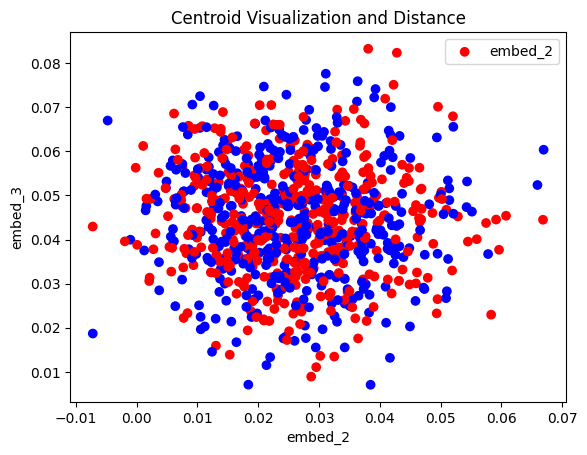

In [ ]:
centroid1 = df['embed_2'].mean()
centroid2 = df['embed_3'].mean()

Mean = df.mean(axis=0)
SD = df.std(axis=0)
print("Mean of all Vectors: \n", Mean)
print("Standard Deviation of all Vectors: \n", SD)

# Calculating the distance between mean vectors between 2 classes
dist1 = np.linalg.norm(centroid1 - centroid2)
dist2 = np.linalg.norm(centroid2 - centroid1)
print("Euclidian Distance of class 1 to class 2:",dist1)
print("Euclidian Distance of class 2 to class 1:",dist2)

a = df['embed_2']
b = df['embed_3']
colors = ['red','blue']*450
plt.scatter( a, b, c=colors, marker='o')

# Add labels and legend
plt.xlabel('embed_2')
plt.ylabel('embed_3')
plt.legend(['embed_3', 'Label 2 for Line 2'])

# Show the plot
plt.title('Centroid Visualization and Distance')
plt.show()

# **A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data.**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


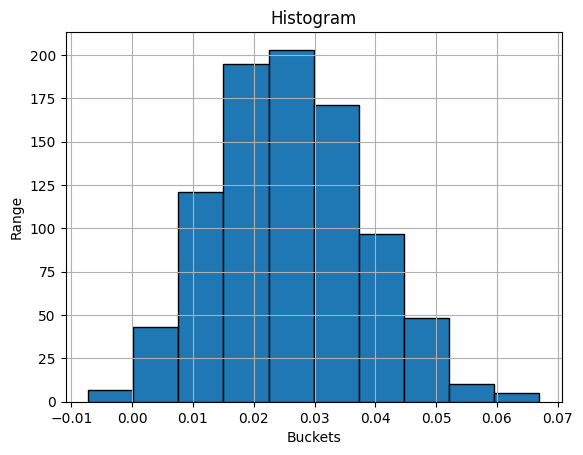

Mean :  embed_2    0.026057
dtype: float64
Variance:  embed_2    0.012173
dtype: float64


In [ ]:
# Took Feature ("embed_2")
feature = df.iloc[: , 2:3]
hist = np.histogram(feature)

# Calculating the mean and variance
mean = np.mean(feature)
variance = np.std(feature)

# Plotting and showing the histogram
plt.hist(feature, edgecolor='black')
plt.xlabel('Buckets')
plt.ylabel('Range')
plt.title('Histogram')
plt.grid(True)
plt.show()

print("Mean : ", mean)
print("Variance: ", variance)


# **A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10. Make a plot of the distance and observe the nature of this graph.**

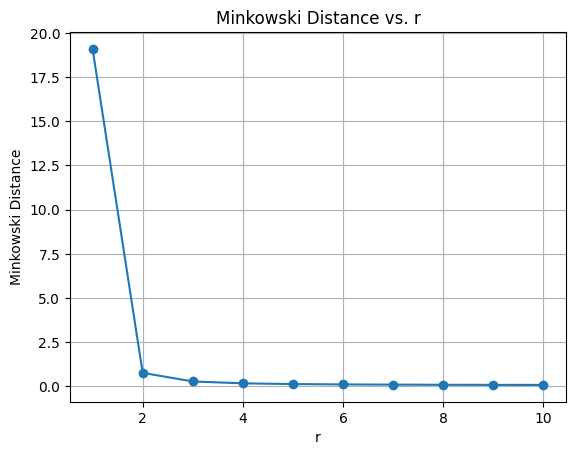

In [ ]:
Vector1 = df.iloc[: , 2:3].values  #embed_2
Vector2 = df.iloc[: , 3:4].values  #embed_3

distances = []

# Calculating Minkowski distances for r from 1 to 10
for r in range(1, 11):
    distance = np.power(np.sum(np.abs(Vector1 - Vector2) ** r),1.0 / r)
    distances.append(distance)

# Plot of Minkowski distances
plt.plot(range(1, 11), distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

# **A4. Divide dataset in your project into two parts –train & test set. To accomplish this, use the train-test_split() function available in SciKit.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Threshold to segregate into 2 classes (range[0,1] as 0 and range[2,10] as 1)
threshold = 1
y_binary = np.where(y >= threshold, 1, 0)

X_train,X_test,y_train,y_test=train_test_split(X,y_binary,test_size=0.3)

# **A5. Train a kNN classifier (k =3)using the training set obtained from above exercise.**

In [ ]:
knn_Classifier = KNeighborsClassifier(n_neighbors=3)
knn_Classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# **A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.**

In [ ]:
y_prediction = knn_Classifier.predict(X_test)
print("Predicted class:", y_prediction)

Predicted class: [1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 1]


In [ ]:
y_pred_train = knn_Classifier.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,

# **A6. Test the accuracy of the kNNusing the test set obtained from above exercise.**

In [ ]:
# Accuracy
Accuracy = accuracy_score(y_test,y_prediction)
percentage =  Accuracy * 100
print( f"Accuracy : {percentage} % ")

Accuracy : 70.0 % 


# **A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.**

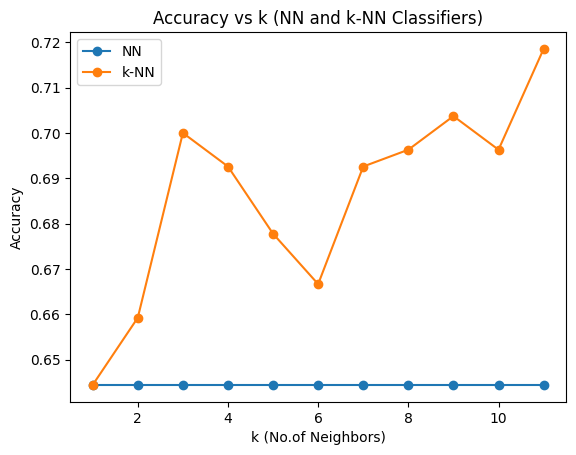

Acuracy for nn classifier: [0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445, 0.6444444444444445]
Accuracy for k-nn classifier: [0.6444444444444445, 0.6592592592592592, 0.7, 0.6925925925925925, 0.6777777777777778, 0.6666666666666666, 0.6925925925925925, 0.6962962962962963, 0.7037037037037037, 0.6962962962962963, 0.7185185185185186]


In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# NN classifier with k=1
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train, y_train)


# k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Initialize arrays to store accuracy values
k_values = range(1, 12)
accuracy_nn = []
accuracy_knn = []

for k in k_values:
    # Train k-NN classifiers with different values of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    # Predict using both NN and k-NN classifiers
    y_pred_nn = nn.predict(X_test)
    y_pred_knn = knn.predict(X_test)


    # Calculate and store accuracy scores
    accuracy_nn.append(accuracy_score(y_test, y_pred_nn))
    accuracy_knn.append(accuracy_score(y_test, y_pred_knn))

# Plot the accuracy results

plt.plot(k_values, accuracy_nn, label='NN', marker='o', linestyle='-')
plt.plot(k_values, accuracy_knn, label='k-NN', marker='o', linestyle='-')
plt.xlabel('k (No.of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (NN and k-NN Classifiers)')
plt.legend()
plt.show()

print('Acuracy for nn classifier:',accuracy_nn)
print('Accuracy for k-nn classifier:',accuracy_knn)

# **A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit/ regularfit / overfit).**

In [ ]:
confusion_matrix(y_test,y_prediction)

array([[ 58,  44],
       [ 37, 131]])

In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       102
           1       0.75      0.78      0.76       168

    accuracy                           0.70       270
   macro avg       0.68      0.67      0.68       270
weighted avg       0.70      0.70      0.70       270



In [ ]:
from sklearn.metrics import f1_score

train_f1_score = f1_score(y_train,y_pred_train)
print("Training F1-Score:", train_f1_score)

test_f1_score = f1_score(y_test,y_prediction)
print("Testing F1-Score:", test_f1_score)

threshold = 0.07

if abs(train_f1_score - test_f1_score) < threshold:
    outcome = "Regular Fit"
elif train_f1_score > test_f1_score:
    outcome = "Overfitting"
else:
    outcome = "Underfitting"

# Print the learning outcome
print("Model Learning Outcome:", outcome)

Training F1-Score: 0.8763440860215055
Testing F1-Score: 0.7638483965014577
Model Learning Outcome: Overfitting


In [ ]:
abs(train_f1_score - test_f1_score)

0.11249568952004774